In [52]:
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath('..'))
from catdb.db.database import CatWeightDB

db_file = "/Users/hide/Documents/sqlite3/goro_weight.db"
db = CatWeightDB(db_file)
db.connect()

In [53]:
df = db.get_all_records()
print(df)



          date  weight   notes
0   2021-10-22     1.0  お迎えした日
1   2021-10-24     1.1    None
2   2021-10-29     1.2    None
3   2021-11-02     1.3    None
4   2021-11-04     1.4    None
..         ...     ...     ...
144 2024-10-19     5.2    体調不良
145 2024-10-21     5.3    None
146 2024-11-02     5.6    None
147 2024-11-13     5.8     急成長
148 2024-11-24     5.8    体重維持

[149 rows x 3 columns]


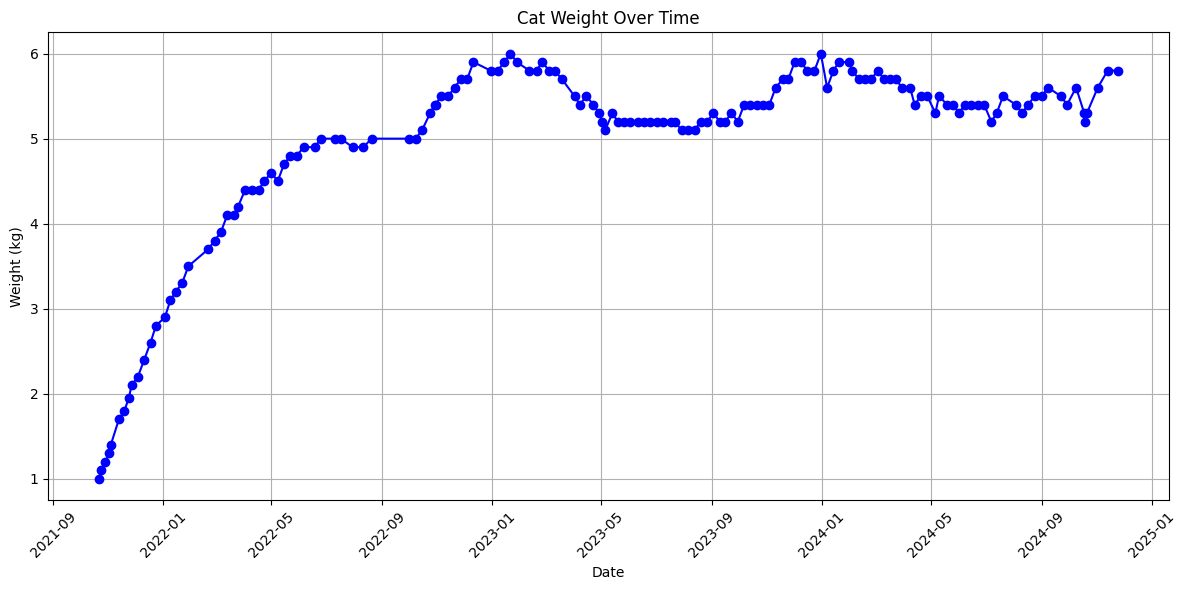

In [54]:
import matplotlib.pyplot as plt

# Date列を日付型に変換しておく（必要な場合）
df['date'] = pd.to_datetime(df['date'])

# 折れ線グラフの描画
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['weight'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.title('Cat Weight Over Time')
plt.xticks(rotation=45)  # 日付のラベルを45度傾けて表示
plt.grid()
plt.tight_layout()
plt.show()

In [55]:
def plot_weight_by_year(df: pd.DataFrame, year: int) -> None:
    """
    Plots the weight changes over time for a specified year.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing 'date' and 'weight' columns.
    - year (int): The year for which to plot weight changes.

    Returns:
    - None
    """
    # Ensure 'date' column is in datetime format if necessary
    df['date'] = pd.to_datetime(df['date'])

    # Filter the DataFrame for the specified year
    df_year = df[df['date'].dt.year == year]

    # Check if there is data for the specified year
    if df_year.empty:
        print(f"No data available for the year {year}.")
        return

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df_year['date'], df_year['weight'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date')
    plt.ylabel('Weight (kg)')
    plt.title(f'Cat Weight Over Time in {year}')
    plt.xticks(rotation=45)  # Rotate date labels for readability
    plt.grid()
    plt.tight_layout()
    plt.show()

    

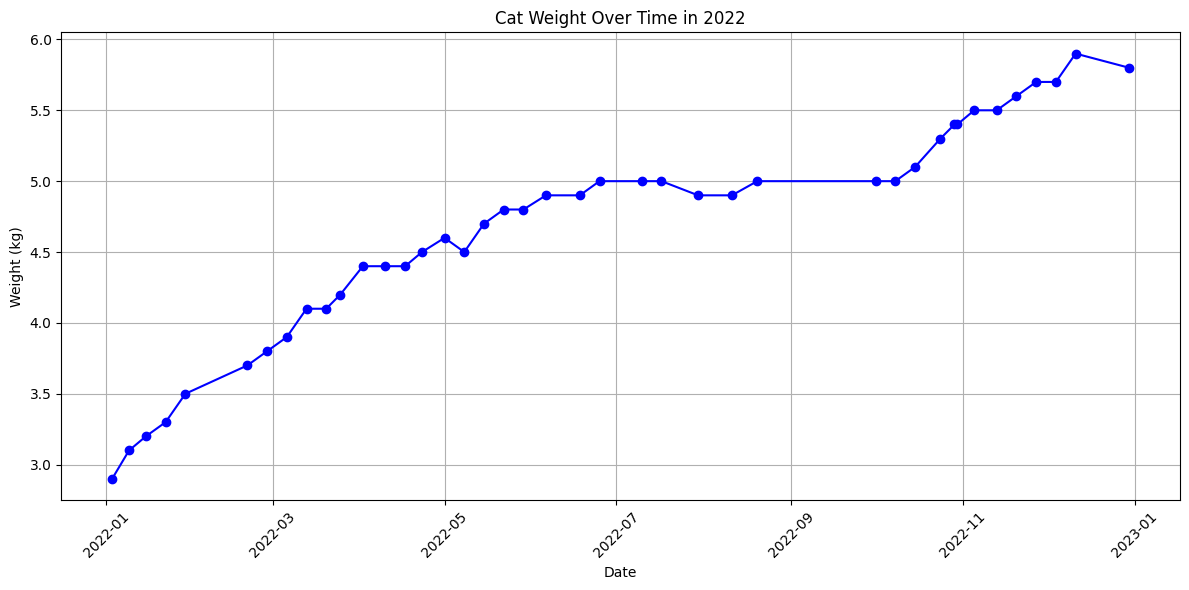

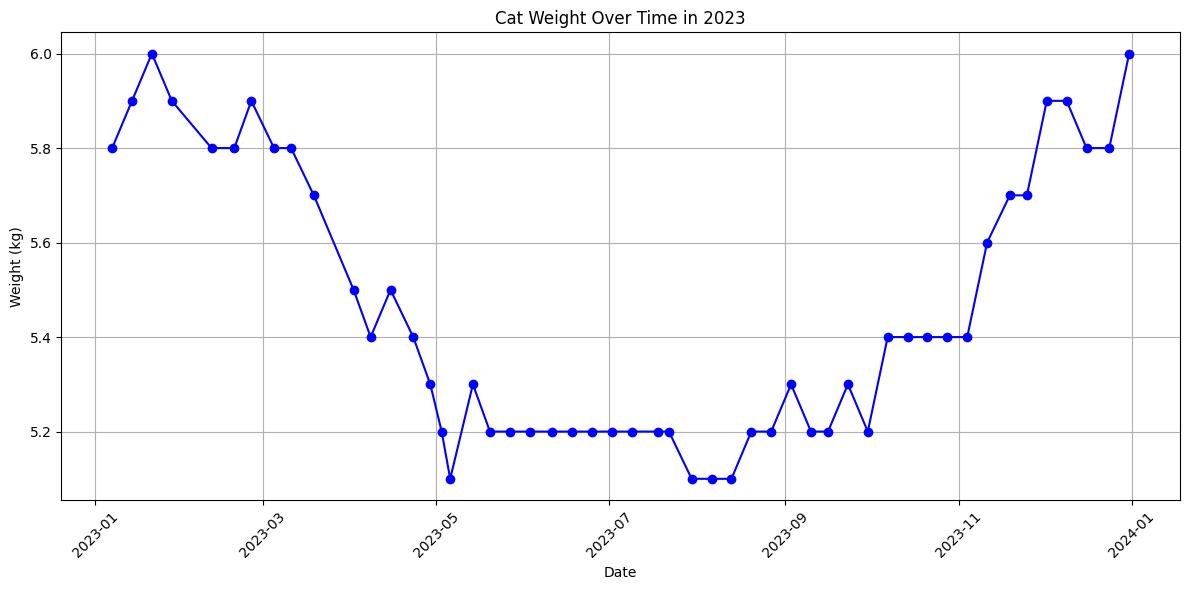

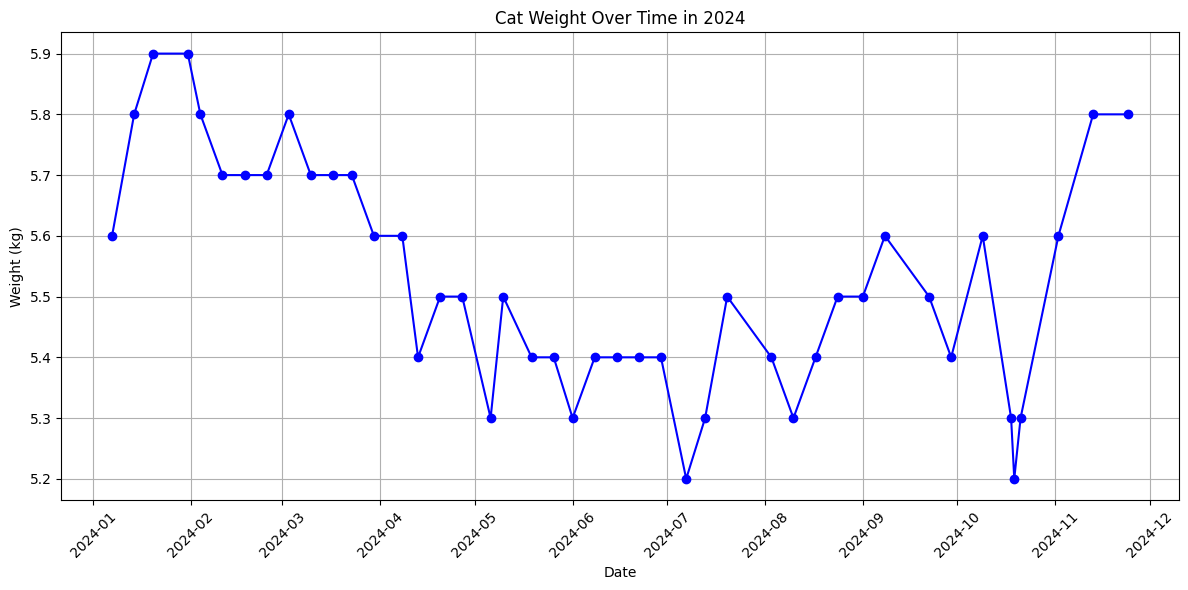

In [56]:
plot_weight_by_year(df, 2022)
plot_weight_by_year(df, 2023)
plot_weight_by_year(df, 2024)


In [57]:
def plot_weight_trends_by_years(df: pd.DataFrame, years: list[int]) -> None:
    """
    Plots weight changes over time for multiple years on the same graph.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing 'date' and 'weight' columns.
    - years (list[int]): List of years to plot.

    Returns:
    - None
    """
    # Ensure 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    plt.figure(figsize=(12, 6))
    
    for year in years:
        # Filter data for the specific year
        df_year = df[df['date'].dt.year == year]
        
        if df_year.empty:
            print(f"No data available for the year {year}.")
            continue

        # Extract day of year for plotting purposes to align across years
        df_year = df_year.copy()  # Avoid SettingWithCopyWarning
        df_year['day_of_year'] = df_year['date'].dt.dayofyear

        # Plot the data for the year
        plt.plot(df_year['day_of_year'], df_year['weight'], marker='o', linestyle='-', label=str(year))

    # Labels and title
    plt.xlabel('Day of Year')
    plt.ylabel('Weight (kg)')
    plt.title('Cat Weight Trends by Year')
    plt.legend(title="Year")
    plt.grid()
    plt.tight_layout()
    plt.show()

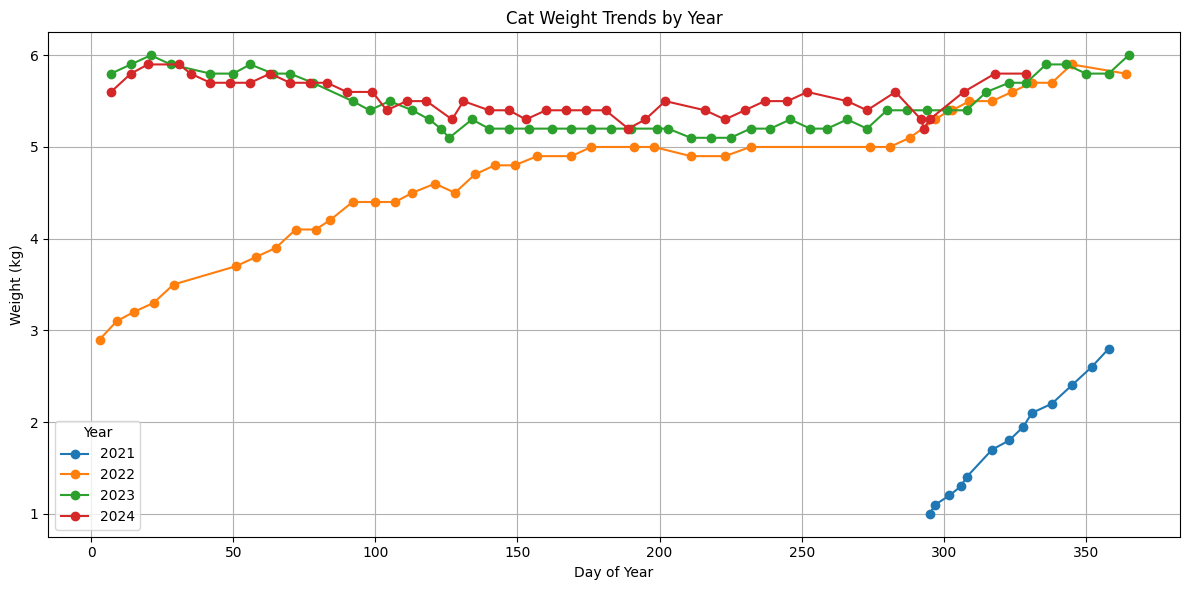

In [58]:
plot_weight_trends_by_years(df, [2021, 2022, 2023, 2024])
